In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv(r'D:\Kuliah\hima\digiclass\dataset\Orders.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
def cleaning_data(data):
    data.columns = data.columns.str.replace(' ','_')
    data.columns = data.columns.str.lower()
    data['order_date'] = pd.to_datetime(data['order_date'])
    data['month'] = [data['order_date'][x].month for x in range(len(data['order_date']))]
    
    return data

In [6]:
def profit_month_per_year(year):
    data = cleaning_data(df)
    
    month_profit_sales_year = {'date' :['Januari','Februari','Maret','April', 'Mei', 'Juni', 'Juli', 
                       'Agustus', 'September', 'Oktober', 'November','Desember'],
                          'profit':[],
                          'sales':[]}
    
    tahun = data[(data['order_date'] >= f'1/1/{year}') & (data['order_date'] <= f'12/31/{year}')]
    sort_month = tahun.groupby(['month'])

    count=0
    for x in range(12):
        count+=1
        profit_month = sort_month.get_group(count)['profit'].sum()
        sales_month = sort_month.get_group(count)['sales'].sum()

        month_profit_sales_year['profit'].append(profit_month)
        month_profit_sales_year['sales'].append(sales_month)

    return pd.DataFrame(month_profit_sales_year)

In [7]:
def profit_all_month():
    
    data = cleaning_data(df)
    
    month_profit_sales = {'date' :pd.date_range('1-2014',periods=48,freq='m'),
                          'profit':[],
                          'sales':[]}
    
    for year in [14,15,16,17]:
        tahun = data[(data['order_date'] >= f'1/1/20{year}') & (data['order_date'] <= f'12/31/20{year}')]
        sort_month = tahun.groupby(['month'])
    
        count=0
        for x in range(12):
            count+=1
            profit_month = sort_month.get_group(count)['profit'].sum()
            sales_month = sort_month.get_group(count)['sales'].sum()
            
            month_profit_sales['profit'].append(profit_month)
            month_profit_sales['sales'].append(sales_month)

    return pd.DataFrame(month_profit_sales)

In [8]:
def visualization(data_filter,judul):
    fig, ax = plt.subplots(figsize = (10,5))

    plt.title(judul)
    plt.xticks(rotation=45)

    ax2 = ax.twinx()

    ax.plot(data_filter['date'],data_filter['profit'], color='g', marker='o')
    ax2.plot(data_filter['date'],data_filter['sales'], color='b', marker='o')

    ax.set_xlabel('Rentang Waktu', color = 'r')
    ax.set_ylabel('Profit', color = 'g')

    ax2.set_ylabel('Sales', color = 'b')

    plt.tight_layout()

    plt.show()

In [9]:
tahun_2017 = profit_month_per_year(2017)
tahun_2017

,date,profit,sales
0,Januari,7140.4391,43971.3740
1,Februari,1613.8720,20301.1334
2,Maret,14751.8915,58872.3528
3,April,933.2900,36521.5361
4,Mei,6342.5828,44261.1102
5,Juni,8223.3357,52981.7257
6,Juli,6952.6212,45264.4160
7,Agustus,9040.9557,63120.8880
8,September,10991.5556,87866.6520
9,Oktober,9275.2755,77776.9232


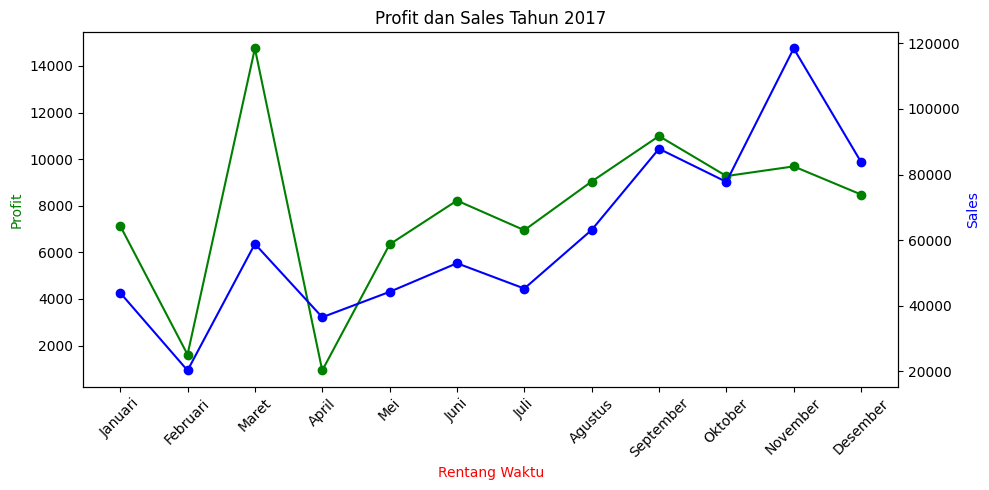

In [10]:
visualization(tahun_2017, 'Profit dan Sales Tahun 2017')